In [5]:
import aeon
import pandas as pd
from aeon.datasets import load_from_tsfile

In [2]:
X,y = load_from_tsfile('data/2022-dataset_.ts')

In [39]:
from sklearn.calibration import cross_val_predict
from aeon.classification.hybrid import HIVECOTEV2
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, train_test_split

rocket = HIVECOTEV2()
skf = StratifiedKFold(n_splits=5)

y_pred = cross_val_predict(rocket, X,y, cv=skf,method='predict_proba')



KeyboardInterrupt: 

In [ ]:
print(precision_score(y,y_,pos_label=' positivo'))
print(recall_score(y,y_,pos_label=' positivo'))
print(confusion_matrix(y,y_))

0.17073170731707318
0.007856341189674524
[[9359   34]
 [ 884    7]]


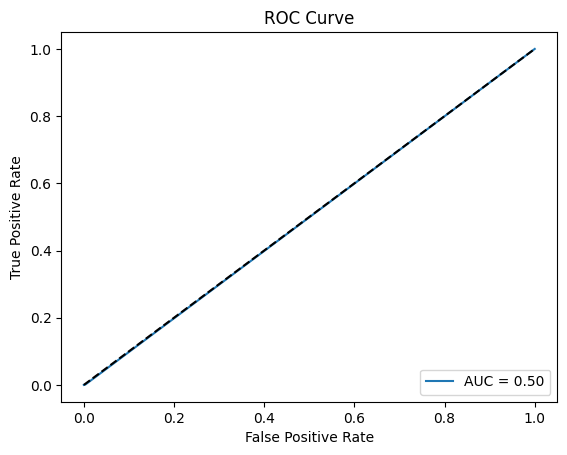

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

df_prob = pd.DataFrame()
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1],pos_label=' positivo')
auc_score = roc_auc_score(y, y_pred[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
from aeon.transformations.collection.convolution_based import Rocket
from aeon.transformations.collection.feature_based import Catch22
rocket = Rocket()
catch22 = Catch22()
X_ = catch22.fit_transform(X)
X_

KeyboardInterrupt: 

In [7]:
df = pd.DataFrame(X_)
df['Resultado'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,Resultado
0,0.468750,17.631903,0.416667,12.320265,0.593750,12.376127,0.469697,9.545474,0.479167,9.448321,...,8.924184,0.527778,8.995052,0.416667,17.110666,0.697917,4.765210,0.733333,3.071980,negativo
1,0.416667,15.397430,0.395833,10.591691,0.520833,14.038107,0.560606,11.838513,0.375000,13.091704,...,9.746537,0.500000,11.807646,0.375000,15.484642,0.770833,6.573638,0.711111,3.012381,negativo
2,0.458333,17.722982,0.427083,12.499887,0.552083,13.358774,0.515152,9.296253,0.385417,7.884061,...,9.418978,0.541667,11.350969,0.385417,18.868406,0.708333,5.069366,0.788889,3.234021,negativo
3,0.458333,17.220028,0.375000,9.581012,0.531250,17.368752,0.575758,11.095721,0.343750,7.474994,...,9.702642,0.541667,11.996896,0.385417,14.330928,0.666667,4.882214,0.811111,3.326917,negativo
4,0.489583,17.729784,0.447917,7.382622,0.395833,20.318060,0.484848,17.473339,0.489583,17.800398,...,11.730793,0.513889,14.382669,0.531250,13.997004,0.739583,5.578257,0.777778,3.624086,negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0.447917,15.758168,0.500000,8.012345,0.520833,16.309059,0.560606,10.369781,0.385417,11.216623,...,8.025503,0.486111,14.609266,0.458333,11.807361,0.760417,6.278790,0.711111,2.871506,negativo
10280,0.458333,15.588880,0.447917,7.316504,0.489583,12.441945,0.545455,9.353127,0.385417,11.768959,...,8.025917,0.555556,8.564052,0.427083,12.949524,0.770833,6.253478,0.711111,2.871846,negativo
10281,0.447917,15.756278,0.447917,8.720002,0.531250,10.784750,0.560606,10.372927,0.385417,11.205356,...,8.025503,0.500000,15.214528,0.427083,13.193475,0.760417,6.275857,0.711111,2.871506,negativo
10282,0.447917,15.768167,0.437500,7.458705,0.468750,13.787110,0.560606,10.368575,0.385417,11.231585,...,8.025503,0.555556,8.581169,0.437500,11.747073,0.760417,6.276249,0.711111,2.871506,negativo


In [9]:
df.to_csv('data/2022-rocket.csv')